In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
import scipy
from scipy import ndimage

In [4]:
def rgb2gray(rgb):
      return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
plt.figure(figsize=(20,20))
def center(gaussian_img):
    edges = cv2.Canny(gaussian_img,50,100)
    cimg = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
    circles = np.uint16(np.around(circles))
    center=circles[0,:]
    x=int(center[0,0])
    y=int(center[0,1])
    r=int(center[0,2])
    return (x,y,r)

<Figure size 1440x1440 with 0 Axes>

In [5]:
def radius(gaussian_img):
    edges = cv2.Canny(gaussian_img,20,20)
    cimg = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
    circles = np.uint16(np.around(circles))
    circles=circles[0,:]
    circles = np.uint16(np.around(circles))
    radiuses=circles[:,2]
    x=[]
    for i in range(len(radiuses)):
        if(radiuses[i]<115 and radiuses[i]>100):
            x.append(radiuses[i])
    return int(np.mean(x))

In [6]:
path=os.getcwd()
path=os.path.join(path,r"D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database")

D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\100\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\101\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\102\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\103\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\104\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\105\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\106\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\107\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\108\01_L.bmp
D:\python\iris-recog\Iris-recognition-with-python-and-opencv-master\code\IITD Database\109\01_L.bmp


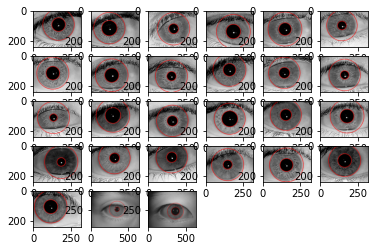

In [9]:
for i in range(100,127):
    img_path=os.path.join(path,str(i))
    img_path=os.path.join(img_path,"01_L.bmp")
    print(img_path)
    image=np.array(cv2.imread(img_path))
    
    gray_img=np.uint8(rgb2gray(image))
     
    selem = disk(6)
    b_tophat = black_tophat(gray_img, selem)
    resultant_img=b_tophat+gray_img
    median_img = cv2.medianBlur(resultant_img,5)
    gaussian_img=scipy.ndimage.filters.gaussian_filter(median_img, 
                                                       sigma=1.90, order=0,output=None, 
                                                       mode='reflect', 
                                                       cval=0.0, truncate=4.0)
    x,y,r=center(gaussian_img)
    R=radius(gaussian_img)
    cv2.circle(image,(x,y),r,(255,0,0),2)
    cv2.circle(image,(x,y),int(R*1.01),(255,0,0),2)
    plt.grid(False)
    plt.subplot(5,6,i-99)
    plt.imshow(image,cmap ='gray')
plt.show()